# Homework 4

## Question 1

Refer to hand written sheet attached.

## Question 2

###a)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.linalg import hilbert
from numpy import linalg as LA
import decimal

A = np.matrix('1 2; 0 2')
b = np.matrix('6 -4')

In [0]:
def gepp(A, b):
  A = A.astype(float)
  b = b.astype(float)
  b = np.transpose(b)
  num_rows, num_cols = np.shape(A)
  Maxes = np.argmax(np.absolute(A), axis=0)
  X = Maxes.item(0)
  A[[X,0]] = A[[0,X]]
  b[[X,0]] = b[[0,X]]
  for j in range(0,num_rows):
    for i in range(j+1,num_rows):
      b[[i]] = (A[i,j]/(-A[j,j])) * b[[j]] + b[[i]]
      A[[i]] = (A[i,j]/(-A[j,j])) * A[[j]] + A[[i]]
  solution = np.zeros(num_rows)
  for i in range(num_rows-1, -1, -1):
    temp = b[i]
    for j in range(num_rows -1 - i,-1,-1):
      temp = temp - (solution[i+j] * A[i,i+j])
    solution[i] = temp/ A[i,i]
  return(solution)

###b)


In [0]:
def generate_SPD_mat_and_rhs_vector(n):
    h = 1 / (n+1)
    scal_fac = (1/(h*h))
    A = np.diag(-2*np.ones(n), 0) + np.diag(np.ones(n-1),1) + np.diag(np.ones(n-1),-1)
    A = -scal_fac*A
    x = np.arange(h,(1-h)+h,h)
    b = np.sin(2*np.pi*x)
    b[0] = b[0] - scal_fac
    b[(n-1)] = b[(n-1)] - scal_fac
    return A,b

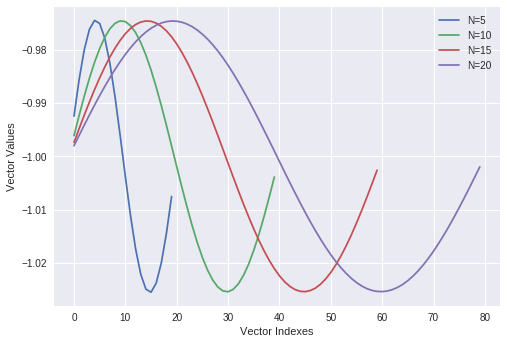

In [0]:
[A,b]=generate_SPD_mat_and_rhs_vector(20)
[A1,b1]=generate_SPD_mat_and_rhs_vector(40)
[A2,b2]=generate_SPD_mat_and_rhs_vector(60)
[A3,b3]=generate_SPD_mat_and_rhs_vector(80)
line0, = plt.plot(gepp(A,b))
line1, = plt.plot(gepp(A1,b1))
line2, = plt.plot(gepp(A2,b2))
line3, = plt.plot(gepp(A3,b3))
plt.xlabel('Vector Indexes')
plt.ylabel('Vector Values')
plt.legend((line0,line1,line2,line3),('N=5','N=10','N=15','N=20'))
plt.show()

###c)

In [0]:
def computeTimes(A,b):
  start = time.time()
  
  for i in range(0,100):
    gepp(A,b)

  end = time.time()
  return((end-start)/100)

Text(0, 0.5, 'Time In Seconds')

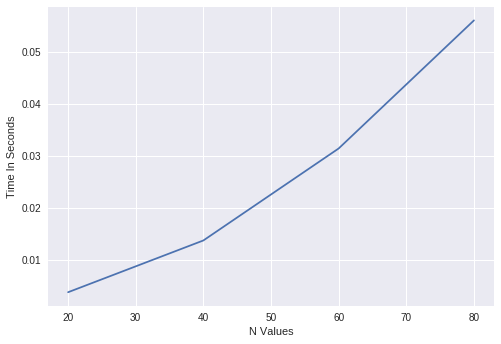

In [0]:
timeArray = []
timeArray.append(computeTimes(A,b))
timeArray.append(computeTimes(A1,b1))
timeArray.append(computeTimes(A2,b2))
timeArray.append(computeTimes(A3,b3))

plt.plot([20,40,60,80],timeArray)
plt.xlabel('N Values')
plt.ylabel('Time In Seconds')
plt.show()

## Question 3

###a)

In [0]:
conditionNumbers = []
for i in range(8,13):
  conditionNumbers.append(LA.cond(hilbert(i)))
  
print("Condition Numbers:\n",conditionNumbers)

Condition Numbers:
 [15257575538.060041, 493153756446.8762, 16024416992541.715, 522267793928033.5, 1.7514731907091464e+16]


###b)

See attached written sheet

###c)

In [49]:
numDigitsArray = []
for i in conditionNumbers:
  numDigitsArray.append(abs(np.log10(2.2*(10**(-16)))) - np.log10(i))
  
print("Number of correct digits:\n",numDigitsArray)

Number of correct digits:
 [5.474091790414381, 3.964594973601084, 2.4527950813942994, 0.9396840736406027, -0.5858261749074387]


###d)


In [71]:
for i in range(8,13):
  A = hilbert(i)
  A = np.float64(A)
  b = np.float64([sum(i) for i in A])
  print(LA.solve(A, np.transpose(b)),"\n")

[1.         1.         0.99999998 1.0000001  0.99999974 1.00000037
 0.99999974 1.00000007] 

[1.         1.00000002 0.99999966 1.00000245 0.99999102 1.00001832
 0.99997898 1.00001269 0.99999687] 

[1.         1.00000007 0.99999842 1.00001432 0.99993198 1.00018629
 0.99969531 1.00029365 0.9998462  1.00003375] 

[0.99999999 1.00000071 0.99998152 1.0002066  0.99876902 1.00432858
 0.99057385 1.01285236 0.98932278 1.00494066 0.99902392] 

[0.99999995 1.00000687 0.99978382 1.00294706 0.97838296 1.0950353
 0.73506236 1.47981331 0.43722126 1.41233876 0.8284976  1.0309108 ] 



###e)

My estimates turned out to be pretty similar. Larger Ns have greater error

## Question 4

### View attached hand written sheets